In [1]:
!pip3 install --user  pyreadr

In [2]:
import pandas as pd
import pyreadr
import pickle
import numpy as np
import os
from matplotlib import pyplot as plt

In [3]:
path_project = "/scratch/project_2003104/gtikhono/realtime_birds"
dir_orig_data = "orig_data"
dir_data = "data"

In [4]:
df = pd.read_csv("/scratch/project_2003104/gtikhono/realtime_birds/orig_data/MK_real_durations.csv")

In [5]:
df.head()

,url,rec_id,real_duration
0,https://2007581-bird-2.a3s.fi/8dae62dd-0316-41...,8dae62dd-0316-41e3-8826-d08391cb4272,37.8
1,https://2007581-bird-2.a3s.fi/060e5448-ef5a-49...,060e5448-ef5a-495d-ace6-4b82f64e9cf6,45.3
2,https://2007581-bird-2.a3s.fi/294b6ce6-42b9-48...,294b6ce6-42b9-4850-b645-00af0394677b,12.1
3,https://2007581-bird-2.a3s.fi/c87a13c3-42ad-4f...,c87a13c3-42ad-4fd1-89e1-b36b1047614f,8.0
4,https://2007581-bird-2.a3s.fi/ec5d480c-e3dd-49...,ec5d480c-e3dd-493c-ab12-8562f06c84d1,73.9


In [6]:
meta = pyreadr.read_r(os.path.join(path_project, dir_orig_data, "meta.RData"))

In [7]:
meta.keys()

odict_keys(['XData', 'cell.idx', 'migration.pars', 'singing.pars'])

In [8]:
XData = meta["XData"]

In [9]:
meta["XData"].head()

,date,j.date,hr,duration,rec_type,lon,lat,user
0,2023-03-27,85.0,17.358620,15.8,direct,26.831872,64.552742,user_311872
1,2023-03-28,86.0,8.976955,4.9,direct,26.831845,64.552735,user_311872
2,2023-03-28,86.0,9.056117,17.0,direct,26.831824,64.552740,user_311872
3,2023-03-28,86.0,9.072506,8.6,direct,26.831907,64.552695,user_311872
4,2023-03-28,86.0,9.089729,35.6,direct,26.831824,64.552739,user_311872


In [10]:
meta["XData"].shape

(8820770, 8)

In [11]:
meta["migration.pars"].head()

,co.first.1,co.first.2,co.last.1,co.last.2,pm.first,pm.last,day1,day2
Chloris chloris,-20.000000,0.000000,400.000000,0.000000,1.000000,1.000000,0.0,0.0
Ficedula hypoleuca,-9.585293,2.374318,192.044640,0.061587,25.267569,27.779167,0.0,0.0
Turdus iliacus,-258.374546,5.823682,775.810244,-8.392168,28.300215,70.618044,0.0,0.0
Phylloscopus trochilus,-56.348579,2.960777,588.817703,-6.016158,14.065667,48.763756,0.0,0.0
Turdus merula,-807.191935,13.315181,1135.277672,-12.671696,67.102577,94.550687,0.0,0.0


In [12]:
with open("/scratch/project_2003104/gtikhono/realtime_birds/data/species/acanthis_flammea/acanthis_flammea_prior.pickle", 'rb') as handle:
    species = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/project_2003104/gtikhono/realtime_birds/data/species/acanthis_flammea/acanthis_flammea_prior.pickle'

In [13]:
species.head()

NameError: name 'species' is not defined

In [14]:
sp_list = os.listdir(os.path.join(path_project, dir_data, "species"))
sp_list.sort()

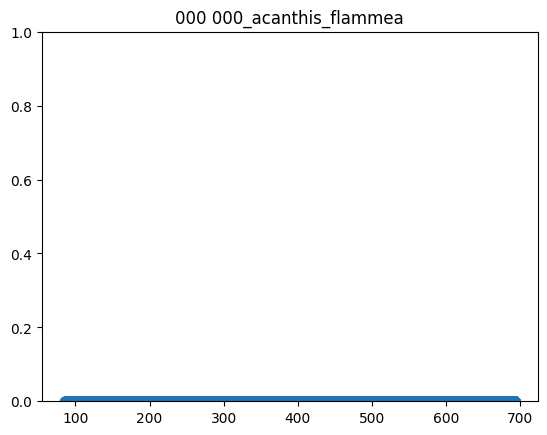

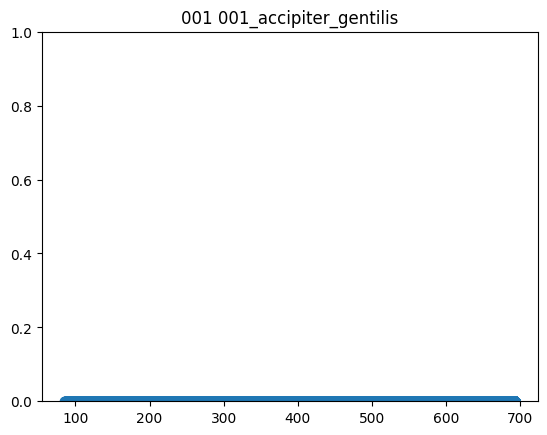

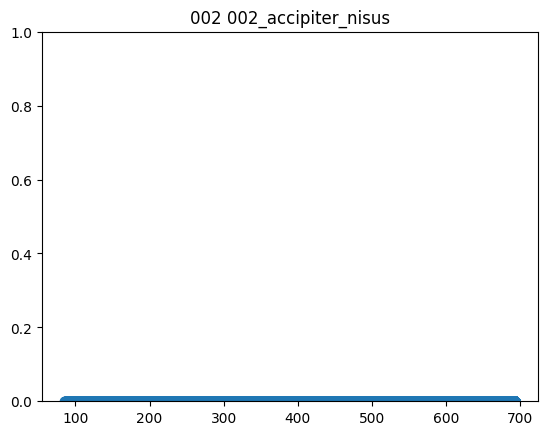

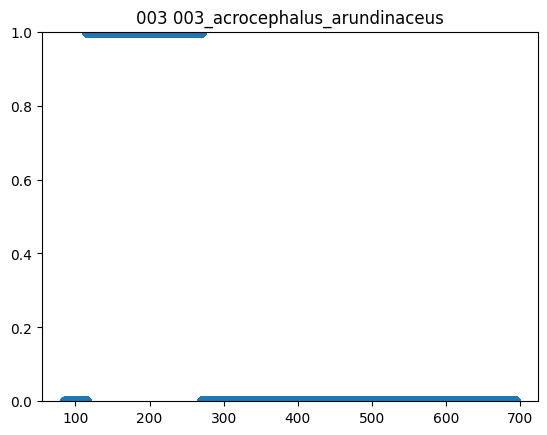

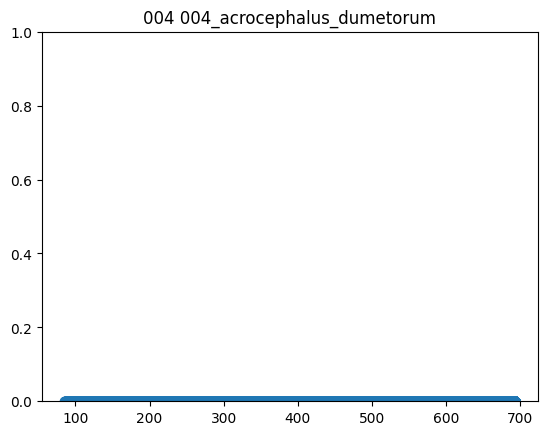

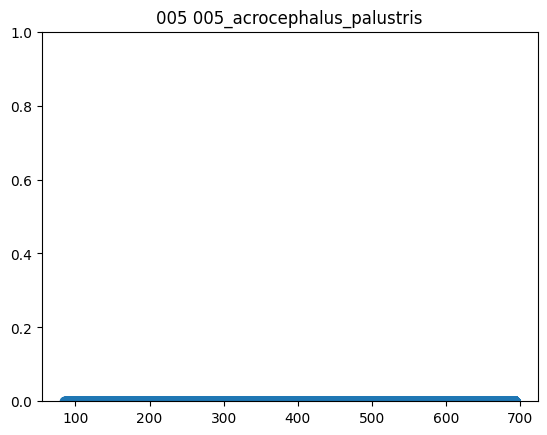

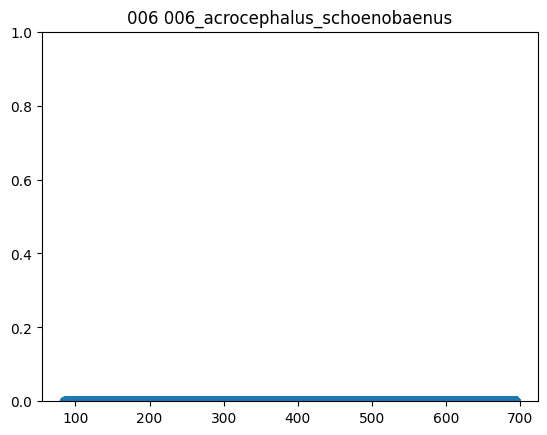

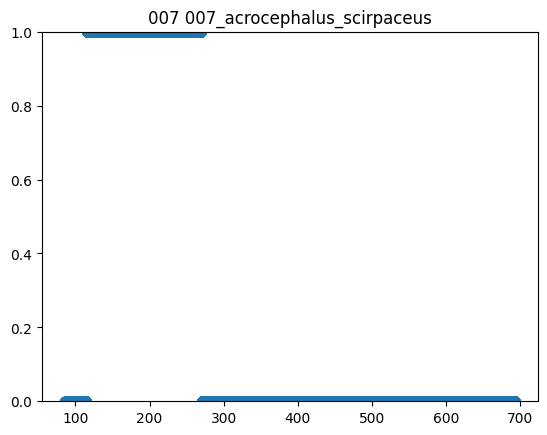

KeyboardInterrupt: 

In [15]:
for j, sp in enumerate(sp_list):
    path_sp = os.path.join(path_project, dir_data, "species", sp)
    with open(os.path.join(path_sp, sp+"_prior.pickle"), 'rb') as handle:
        species = pickle.load(handle)
    plt.scatter(XData["j.date"], species["prior.d.u"])
    plt.ylim([0, 1])
    plt.title(sp)
    plt.show()

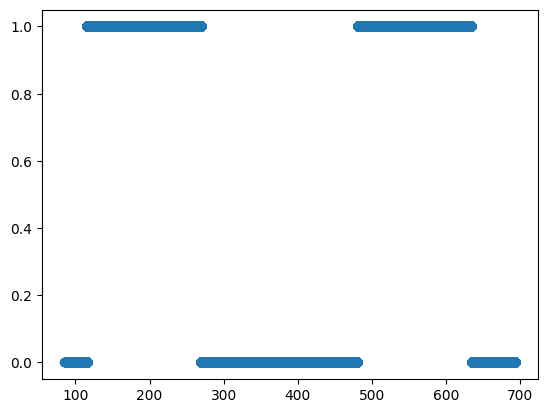

In [16]:
j = 7
sp = sp_list[3]
with open(os.path.join(path_project, dir_data, "migration_prior_params.pickle"), 'rb') as handle:
  prior_m_params = pickle.load(handle)
prior_m_params.loc[sp]
days = XData["j.date"].to_numpy() # in {1,...,730}, but later migration model expects values in {1,...,365}. Use days%365!
use_a = np.logical_and(days % 365 > prior_m_params.loc[sp]["day1"], days % 365 < prior_m_params.loc[sp]["day2"])
plt.scatter(XData["j.date"], use_a)
plt.show()